<a href="https://colab.research.google.com/github/Neelaveninethra/Deep_Learning_laboratory/blob/main/dl_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Implement Perceptron training algorithm to classify flowers in IRIS dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
iris = load_iris()
X = iris.data[:, :2]  # Consider only the first two features for simplicity
y = (iris.target != 0) * 1  # Convert labels to binary (1 if not Iris-setosa, 0 otherwise)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

In [7]:
perceptron

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [8]:
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

# prompt: explain what is the use of random_state

The `random_state` parameter in `train_test_split` and `Perceptron` ensures reproducibility of your results.  Let's break down its function in each context:

**1. `train_test_split(..., random_state=42)`:**

*   **Purpose:**  The `train_test_split` function randomly divides your data into training and testing sets.  Without `random_state`, this split would be different each time you run the code.  This makes it difficult to compare results across different runs or share your work with others, as they'd get a different split.
*   **How `random_state` works:**  It acts as a seed for the random number generator.  Setting `random_state` to a specific number (like 42) guarantees that the data split will always be the same. If you use the same `random_state` value, you will get the same training and testing sets every time you run the code.  If you change the `random_state`, the split will be different.  If omitted, a different random split occurs each run.

**2. `Perceptron(..., random_state=42)`:**

*   **Purpose:**  The `Perceptron` algorithm involves some randomness in its initialization (weight initialization). Setting `random_state` ensures that the perceptron will be initialized the same way every time you run the code.
*   **How `random_state` works:**  Similar to `train_test_split`, it seeds the random number generator used in the algorithm's initialization.  This ensures consistent results across multiple runs and helps in comparing different hyperparameter configurations or algorithms.

**In summary:** Using the same `random_state` value across different runs guarantees that the data splitting and the model's initialization will be identical, leading to consistent and reproducible results.  This is crucial for debugging, experimentation, and comparison in machine learning.


In [ ]:
# prompt: explain what is the use of random_state

The `random_state` parameter in `train_test_split` and `Perceptron` ensures reproducibility of your results.  Let's break down its function in each context:

**1. `train_test_split(..., random_state=42)`:**

*   **Purpose:**  The `train_test_split` function randomly divides your data into training and testing sets.  Without `random_state`, this split would be different each time you run the code.  This makes it difficult to compare results across different runs or share your work with others, as they'd get a different split.
*   **How `random_state` works:**  It acts as a seed for the random number generator.  Setting `random_state` to a specific number (like 42) guarantees that the data split will always be the same. If you use the same `random_state` value, you will get the same training and testing sets every time you run the code.  If you change the `random_state`, the split will be different.  If omitted, a different random split occurs each run.

**2. `Perceptron(..., random_state=42)`:**

*   **Purpose:**  The `Perceptron` algorithm involves some randomness in its initialization (weight initialization). Setting `random_state` ensures that the perceptron will be initialized the same way every time you run the code.
*   **How `random_state` works:**  Similar to `train_test_split`, it seeds the random number generator used in the algorithm's initialization.  This ensures consistent results across multiple runs and helps in comparing different hyperparameter configurations or algorithms.

**In summary:** Using the same `random_state` value across different runs guarantees that the data splitting and the model's initialization will be identical, leading to consistent and reproducible results.  This is crucial for debugging, experimentation, and comparison in machine learning.


In [10]:
y_pred = perceptron.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


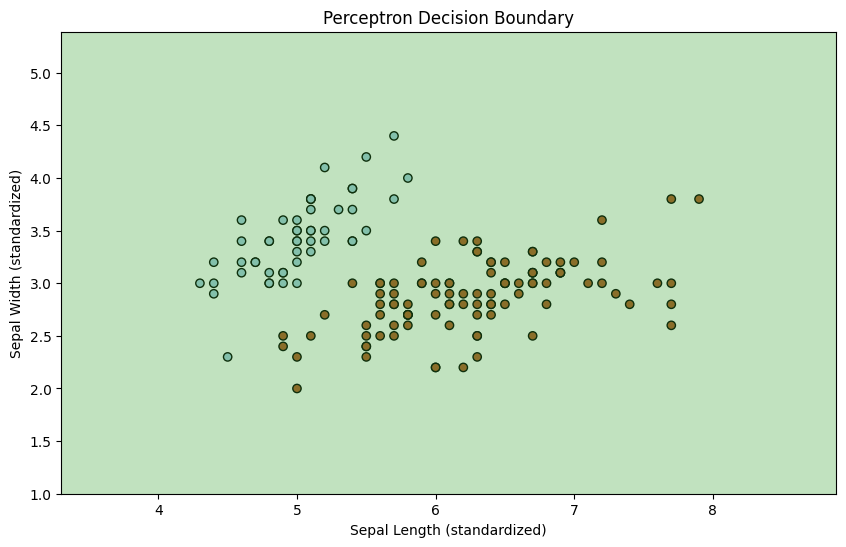

In [13]:
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Perceptron Decision Boundary')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.show()
